In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
for n in range(10, 101, 10):
    sampled = np.random.normal(loc=100, scale=15, size=n)
    print('Sampling ' + str(n) + ' observations')
    print('Mean: ' + str(np.mean(sampled)))
    print('Standard Deviation ' + str(np.std(sampled)))
    print('\n')

Sampling 10 observations
Mean: 95.48862852837178
Standard Deviation 7.649833893766881


Sampling 20 observations
Mean: 103.22302181646015
Standard Deviation 14.054310584905762


Sampling 30 observations
Mean: 100.88323675255248
Standard Deviation 10.693231695877191


Sampling 40 observations
Mean: 99.98184928798369
Standard Deviation 11.104006154799762


Sampling 50 observations
Mean: 98.67045505722882
Standard Deviation 16.106282556566786


Sampling 60 observations
Mean: 99.68851645858408
Standard Deviation 16.942038010828316


Sampling 70 observations
Mean: 101.57107675832906
Standard Deviation 17.369746618476498


Sampling 80 observations
Mean: 101.32956672390421
Standard Deviation 14.711445834780312


Sampling 90 observations
Mean: 100.62154242211076
Standard Deviation 12.509692543038279


Sampling 100 observations
Mean: 99.56565839095764
Standard Deviation 15.874304304765381




As you increase the sample size taken from the population, sample statistics will *approach* towards the **population parameter**. \
**DOES NOT NECESSARILY DECREASE!** (do not confuse std_dev and std_err) As one can see from the example above!

But *standard error* **WILL** decrease as the sample size increases.

In [3]:
for n in range(10, 101, 10):
    sampled = np.random.normal(loc=100, scale=15, size=n)
    print('Sampling ' + str(n) + ' observations')
    std_err = np.std(sampled) / np.sqrt(n)
    print('Standard error approximation: ' + str(std_err))
    print('\n')

Sampling 10 observations
Standard error approximation: 3.3479622572579926


Sampling 20 observations
Standard error approximation: 2.9724991448710982


Sampling 30 observations
Standard error approximation: 2.6905617104067963


Sampling 40 observations
Standard error approximation: 2.6310178233933788


Sampling 50 observations
Standard error approximation: 1.969683878745775


Sampling 60 observations
Standard error approximation: 2.1138762149495203


Sampling 70 observations
Standard error approximation: 1.8242321834165298


Sampling 80 observations
Standard error approximation: 1.7480309445086264


Sampling 90 observations
Standard error approximation: 1.5739663325469169


Sampling 100 observations
Standard error approximation: 1.5171404678835432




How close is the approximation? Let's try it for one sample

In [7]:
n = 51

pop = np.random.normal(loc=100, scale=15, size=300000)

sampled = np.random.choice(pop, size=n)
estimated_mean = np.mean(sampled)
estimated_sd = np.std(sampled)

estimated_std_err = np.std(sampled) / n**.5

print(estimated_mean, estimated_sd, estimated_std_err)

100.99977218324777 15.609205697317774 2.1857259865450622


In [8]:
# Let's take many samples and estimate the mean

mean_estimates = []

for i in range(1000): # Let's do it 1000 times, sampling 51 in each iteration.
    sampled = np.random.choice(pop, size=n)
    mean_estimates.append(np.mean(sampled))

np.std(mean_estimates)

2.128965226863748

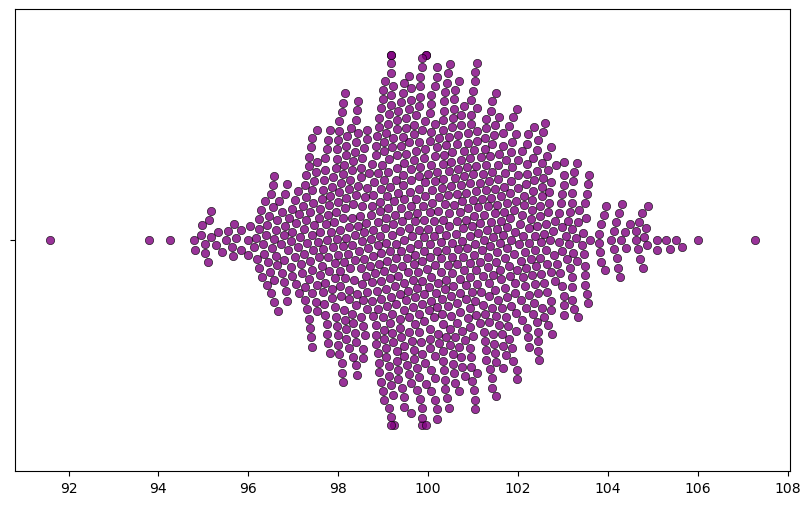

In [9]:
plt.figure(figsize=(10,6))

g = sns.swarmplot(data=mean_estimates, orient="h", size=6, alpha=.8, color="purple", linewidth=0.5,
                 edgecolor="black")

As one can see, it's pretty close. What happens when I lower the sample size?

In [10]:
n = 16
mean_estimates = []

for i in range(1000): # Let's do it 1000 times
    sampled = np.random.choice(pop, size=n)
    mean_estimates.append(np.mean(sampled))

np.std(mean_estimates)

3.724620203382091

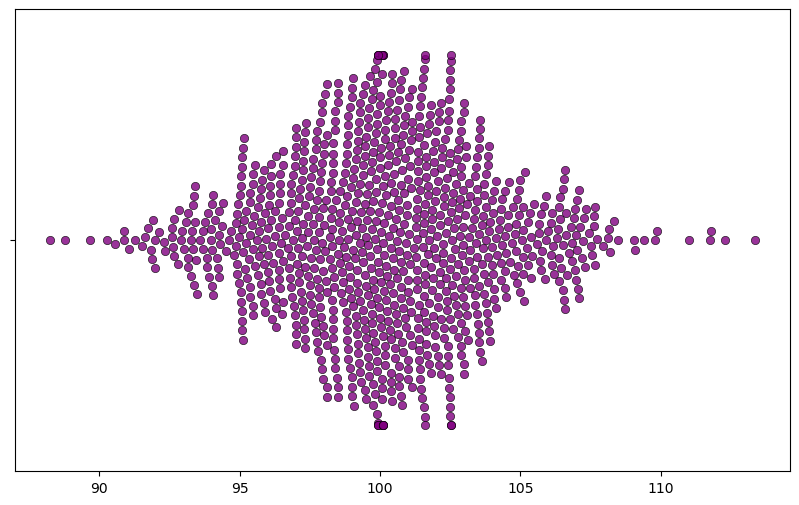

In [11]:
plt.figure(figsize=(10,6))

g = sns.swarmplot(data=mean_estimates, orient="h", size=6, alpha=.8, color="purple", linewidth=0.5,
                 edgecolor="black")

In [12]:
mean_estimates = {
        16:[],
        23:[],
        30:[],
        51:[],
        84:[],
        101:[]
    }

for n in [16, 23, 30, 51, 84, 101]:
    for i in range(500):
        sampled = np.random.choice(pop, size=n)
        mean_estimates[n].append(np.mean(sampled))

mean_estimates

{16: [94.55576223118302,
  99.02812173084703,
  101.2771616322855,
  105.52166944723638,
  94.39470854870642,
  100.02685463745719,
  98.62576320061841,
  103.0932844801304,
  98.27620516368872,
  97.62227000951967,
  101.20747401189277,
  101.20739626122442,
  97.353978044151,
  107.24814716018064,
  96.9817122724896,
  93.51534135612695,
  98.63091726017404,
  99.39417488006805,
  94.9311539999517,
  99.8271354468998,
  100.08360000827875,
  91.8674593976321,
  97.39168210380254,
  92.37047286508268,
  98.29721192559988,
  105.45693162798594,
  99.01022452665643,
  97.62351646954407,
  104.66147528574281,
  96.92602321826077,
  98.57310896216302,
  99.80724944252906,
  103.99894014795595,
  103.40775114646397,
  107.29119362347456,
  97.3856279599616,
  101.11965520272358,
  105.87861515361425,
  103.24358691237144,
  99.45097649325382,
  106.87063068580692,
  100.64554828479676,
  102.30942750147901,
  104.63360322947358,
  96.49098224783754,
  105.42267416474925,
  97.0010955834467

In [13]:
for key in mean_estimates.keys():
    print('Sample size: ' + str(key))
    print('Standard deviation (std_err) around the estimates: ' + str(np.std(mean_estimates[key])))
    print('\n')

Sample size: 16
Standard deviation (std_err) around the estimates: 3.6106382758849227


Sample size: 23
Standard deviation (std_err) around the estimates: 2.959440827795553


Sample size: 30
Standard deviation (std_err) around the estimates: 2.6804400755802913


Sample size: 51
Standard deviation (std_err) around the estimates: 2.1203219923963728


Sample size: 84
Standard deviation (std_err) around the estimates: 1.6215879807972933


Sample size: 101
Standard deviation (std_err) around the estimates: 1.4953930197161398


